In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(f"Animals in project {tv_projects[1]}: {animals}")
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name=tv_projects[1],
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

Animals in project visual_and_COT_data: ['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 301,022,513  speedup is 3,010,225.13
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 240,284,208  speedup is 2,402,842.08
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 284,369,538  speedup is 2,843,695.38
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 219,240,689  speedup is 2,192,406.89
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 203,488,253  speedup is 2,034,882.53
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 219,302,870  speedup is 2,193,028.70
receiving incremental file list

sent 27 bytes  receive

In [3]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_825683/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [4]:
df = dft.analyze_df(df)
print("Dataframe analyzed.")

Dataframe analyzed.


In [9]:
# selection of periods of stable behavior
# remove data from the 2nd to the 7th of July
df_clean = df[(df['date'] < '2025-07-02') | (df['date'] > '2025-07-07')]

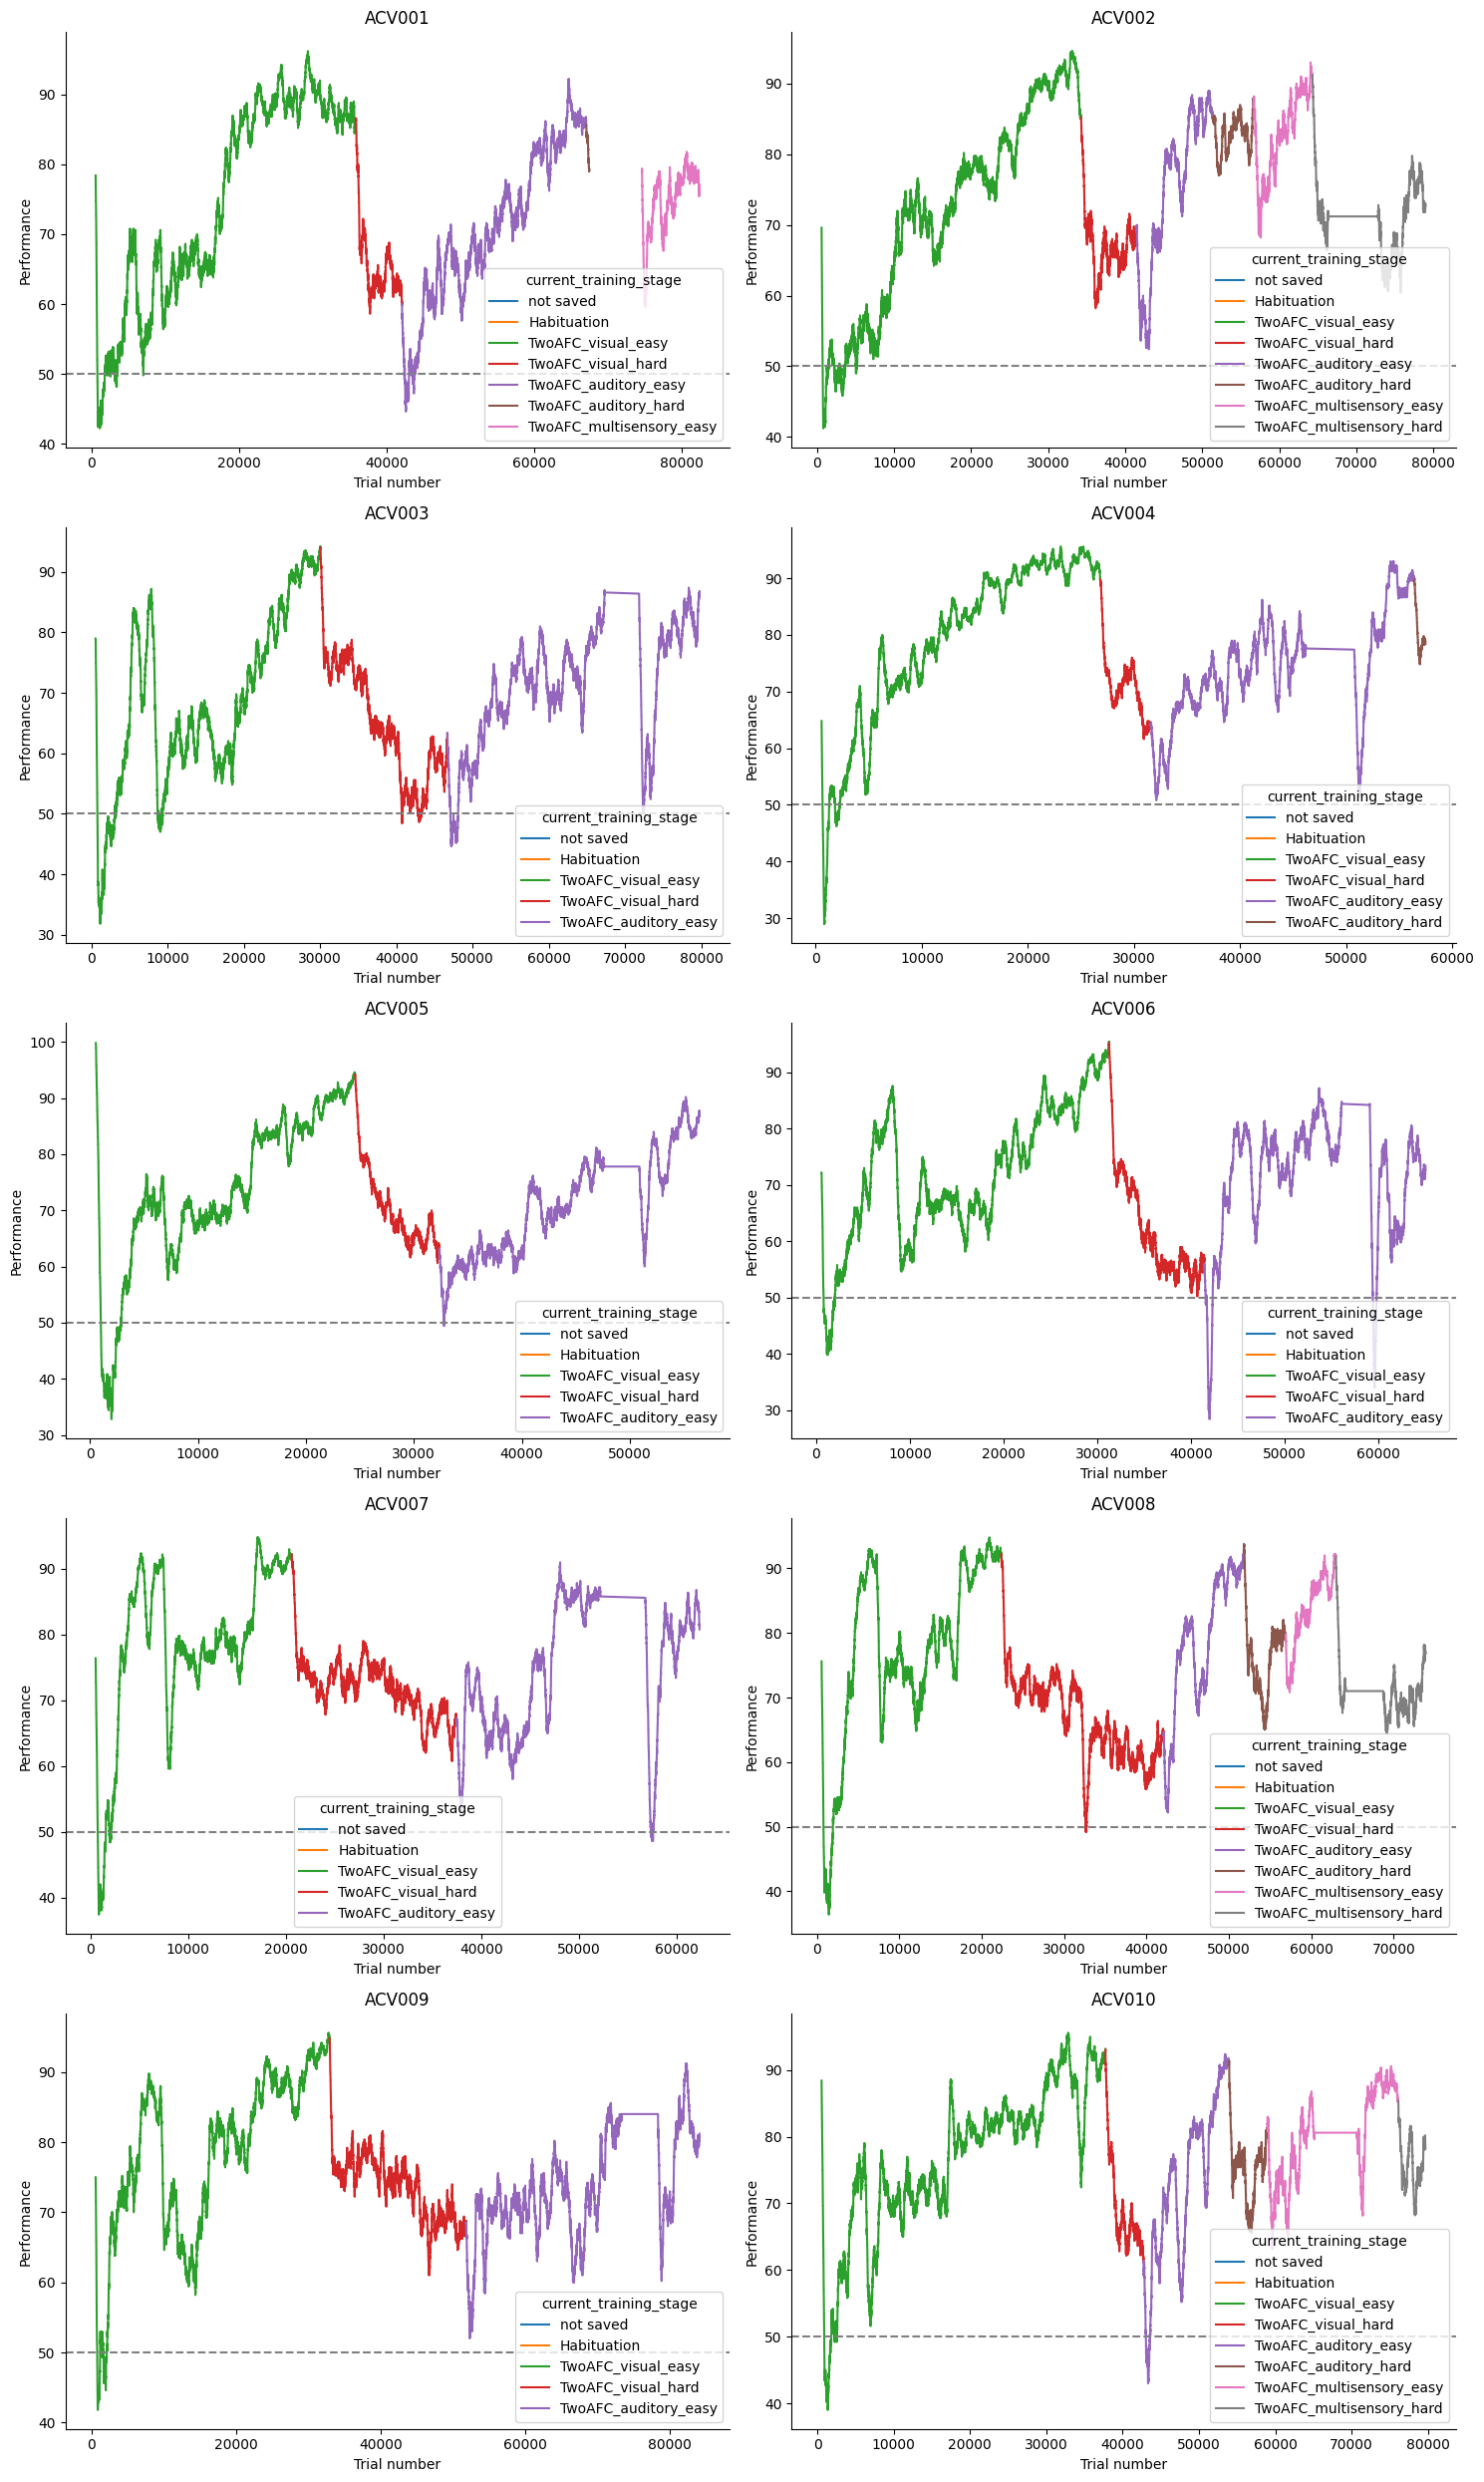

In [10]:
# plot the performance for each animal by training stage
ncols = 2
nrows = int(np.ceil(len(df_clean.subject.unique()) / ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axs = axs.ravel()
window = 500  # number of trials to consider for the performance calculation
for i, subject in enumerate(df_clean.subject.unique()):
    ax_perf = axs[i]
    df_subj = df_clean[df_clean['subject'] == subject]
    # get the performance through trials
    df_subj = dft.get_performance_through_trials(df_subj, window=window)
    ax_perf = plots.performance_vs_trials_plot(df_subj, ax=ax_perf, legend=True)
    ax_perf.set_title(f"{subject}")
    ax_perf.set_xlabel('Trial number')
    ax_perf.set_ylabel('Performance')

# remove the empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

In [14]:
# select only the first 5000 trials of visual hard
vis_hard_df_list = []
for subject in df_clean.subject.unique():
    df_subj = df_clean[(df_clean['subject'] == subject) & (df_clean['current_training_stage'] == 'TwoAFC_visual_hard')]
    if len(df_subj) > 5000:
        df_subj = df_subj.iloc[:5000]
    vis_hard_df_list.append(df_subj)

vis_hard_df = pd.concat(vis_hard_df_list, ignore_index=True)

In [22]:
# save to a csv file
df_to_save = vis_hard_df.groupby(["subject", "difficulty"]).agg({
    "correct": "mean"}).reset_index()

df_to_save.to_csv("figures/visual_discrimination_performance.csv", index=False)

<Axes: xlabel='difficulty', ylabel='correct'>

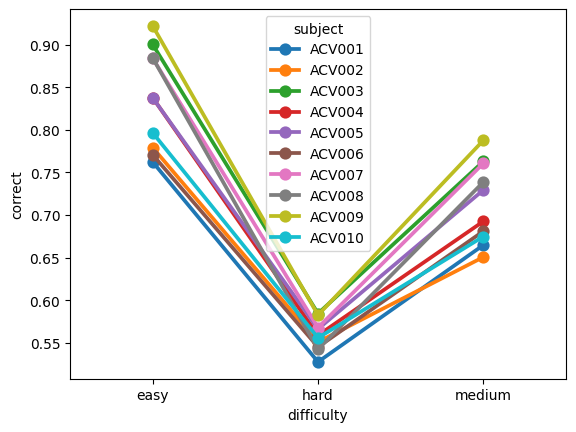

In [21]:
sns.pointplot(data=df_to_save, x='difficulty', y='correct', hue='subject', errorbar='sd')

<Axes: xlabel='difficulty', ylabel='correct'>

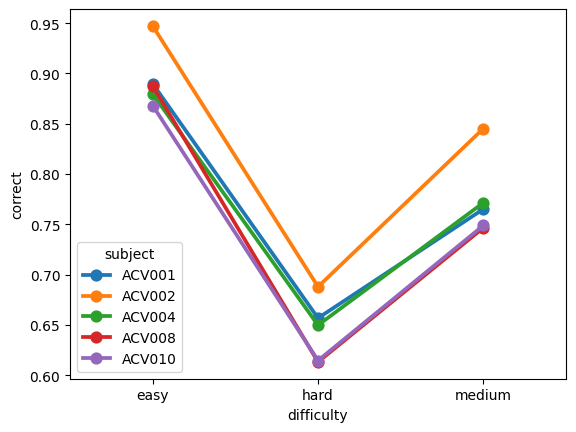

In [23]:
# do the same for the auditory
aud_hard_df = df_clean[df_clean['current_training_stage'] == 'TwoAFC_auditory_hard']
df_to_save = aud_hard_df.groupby(["subject", "difficulty"]).agg({
    "correct": "mean"}).reset_index()
df_to_save.to_csv("figures/auditory_discrimination_performance.csv", index=False)
sns.pointplot(data=df_to_save, x='difficulty', y='correct', hue='subject', errorbar='sd')